<a href="https://colab.research.google.com/github/NarottamSharma/DeepLearning/blob/main/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Load and preprocess the MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8734 - loss: 0.4158 - val_accuracy: 0.9782 - val_loss: 0.0635
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9829 - loss: 0.0541 - val_accuracy: 0.9893 - val_loss: 0.0327
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9882 - loss: 0.0369 - val_accuracy: 0.9900 - val_loss: 0.0293
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9917 - loss: 0.0274 - val_accuracy: 0.9904 - val_loss: 0.0337
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9930 - loss: 0.0205 - val_accuracy: 0.9893 - val_loss: 0.0327
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9858 - loss: 0.0428

Test accuracy: 0.9893


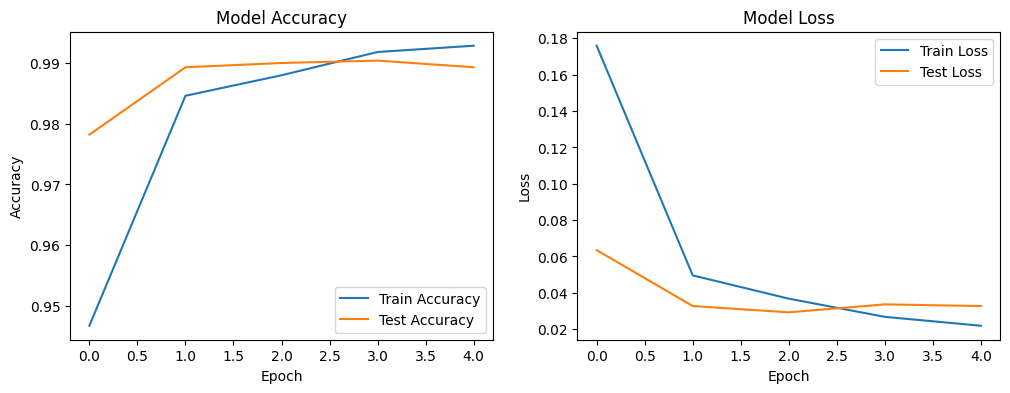

In [7]:
# Reshape the data add a channel dimension
x_train = x_train.reshape((x_train.shape[0],28,28,1)).astype('float32')/255
x_test = x_test.reshape((x_test.shape[0],28,28,1)).astype('float32')/255

# convert the label to categorical one hot encoding
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

# Build the CNN model

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation ='relu',input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation ='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation ='relu'))
model.add(layers.Flatten()) # called as embedding of Image
model.add(layers.Dense(64, activation ='relu'))
model.add(layers.Dense(10, activation ='softmax'))

# Compile the Model

model.compile( optimizer ='adam',
              loss ='categorical_crossentropy',
              metrics =['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc:.4f}')

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()


In [8]:
import cv2

In [10]:
img = cv2.imread("cat.webp")

In [12]:
img.shape

(626, 417, 3)

In [13]:
reshape = img.reshape(1,img.shape[0],img.shape[1],img.shape[2])

In [15]:
reshape.shape

(1, 626, 417, 3)

array([[[238, 238, 238],
        [238, 238, 238],
        [238, 238, 238],
        ...,
        [236, 233, 229],
        [236, 233, 229],
        [234, 233, 229]],

       [[238, 238, 238],
        [238, 238, 238],
        [238, 238, 238],
        ...,
        [236, 233, 229],
        [236, 233, 229],
        [234, 233, 229]],

       [[238, 238, 238],
        [238, 238, 238],
        [238, 238, 238],
        ...,
        [236, 233, 229],
        [236, 233, 229],
        [234, 233, 229]],

       ...,

       [[216, 210, 206],
        [216, 210, 206],
        [216, 210, 206],
        ...,
        [ 77, 100, 126],
        [ 79, 102, 128],
        [ 81, 104, 130]],

       [[216, 210, 206],
        [216, 210, 206],
        [216, 210, 206],
        ...,
        [ 80, 104, 127],
        [ 81, 105, 129],
        [ 79, 106, 129]],

       [[216, 210, 206],
        [216, 210, 206],
        [216, 210, 206],
        ...,
        [ 81, 105, 129],
        [ 82, 106, 130],
        [ 80, 107, 130]]], dtype=uint8)
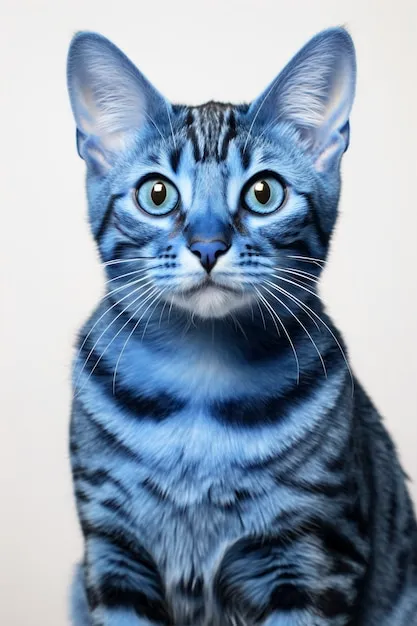

In [18]:
reshape[0]

In [19]:
from glob import glob

In [20]:
files = glob("/content/narottampic/*.png")

In [21]:
images = []
for i in files:
  img = cv2.imread(i)
  img = cv2.resize(img,(28,28))
  images.append(img)

In [22]:
imagesfromBlob = np.array(images)